
# Digital Signal Processing

## Exercise 1

### 1. Discrete Signals and Systems

#### Solution for exercise 1: function generator

**a)** The sinus signal looks as following:

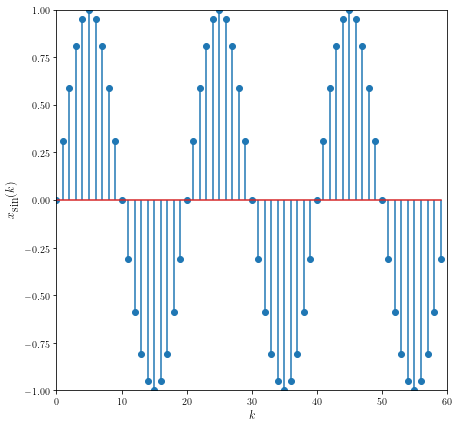

In [69]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import numpy as np                

fA = 8000
# Generating the Signal-Vector
k = np.arange(0,60,1)             # generate a vector of length 60 with entries from 0 to 59
f0 = 400                          # signal-frequency
Omega0 = 2*np.pi* f0/fA           # normalized frequency
xsin = np.sin(Omega0*k)           # vector with values of sinusodial signal

# Graphical output
fig, ax = plt.subplots(figsize=(7, 7))                     # create a plot and get fig and ax objects
ax.set_xlabel(r'$k$', fontsize='large')                    # place label on x-axis
ax.set_ylabel(r'$x_{\textrm{sin}}(k)$', fontsize='large')  # place label on y-axis
ax.set_xlim(0,60)                                          # set x-axis limit
ax.set_ylim(-1,1)                                          # set y-axis limit
ax.stem(k,xsin, use_line_collection=True)                  # discrete plot of k,xsin using stem function
plt.show()                                                 # draw plot

The period of the continuous signal $x_{\text{sin,K}}(t) = \text{sin}\,(2\pi f_0 \cdot t)$ is $T_0 = 1/f_0$. Since the number of samples per period of the time continuous signal is an integer, the discrete signal has to have a period of

\begin{align*}
k_p &= T_0/T\\
&= f_A/f_0\\
&\Downarrow f_A = 8\,\text{kHz},\ f_0 = 400\, \text{Hz}  \\
&= 20
\end{align*}
values.



**b)** After raising the signal frequency to $f_0 = 960\, \text{Hz}$, the period of the time discrete signal and the period of the time continuous signal do not match.

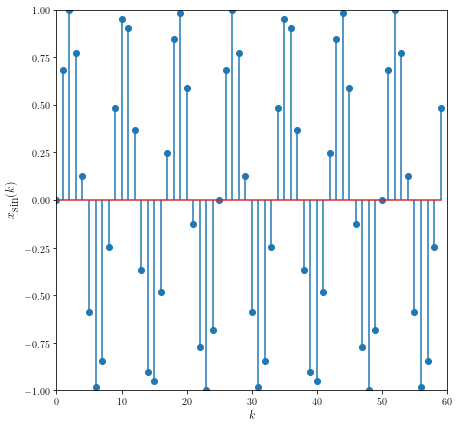

In [68]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import numpy as np                

fA = 8000
# Generating the Signal-Vector
k = np.arange(0,60,1)             # generate a vector of length 60 with entries from 0 to 59
f0 = 960                          # signal-frequency
Omega0 = 2*np.pi* f0/fA           # normalized frequency
xsin = np.sin(Omega0*k)           # vector with values of sinusodial signal

# Graphical output
fig, ax = plt.subplots(figsize=(7, 7))                     # create a plot and get fig and ax objects
ax.set_xlabel(r'$k$', fontsize='large')                    # place label on x-axis
ax.set_ylabel(r'$x_{\textrm{sin}}(k)$', fontsize='large')  # place label on y-axis
ax.set_xlim(0,60)                                          # set x-axis limit
ax.set_ylim(-1,1)                                          # set y-axis limit
ax.stem(k,xsin, use_line_collection=True)                  # discrete plot of k,xsin using stem function
plt.show()                                                 # draw plot

The period of the time discrete signal appears after

\begin{align*}
k_p &= L\cdot T_0/T\\
&= L\cdot f_A/f_0\\
&\Downarrow f_A = 8\,\text{kHz},\ f_0 = 960\, \text{Hz}  \\
&= L \cdot 8.\overline{3}\\
&\Downarrow L = 3\\
&= 25
\end{align*}
samples. For this, $L=3$ is the number of periods of the continuous signal, after which the periodicity of the sampled signal settles.

#### Solution for exercise 2: special series


**a)** For the impulse series, the following figure is plotted:

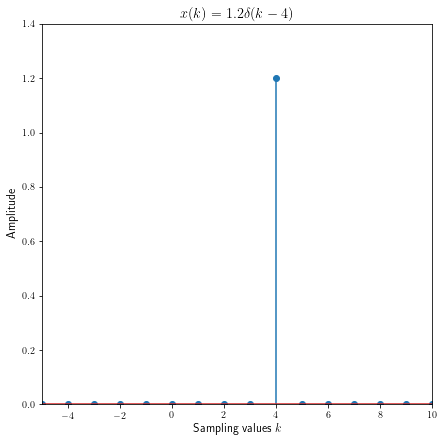

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Generating the Signal-Vector
k = np.arange(-5,11,1)                                # creating index vector k
x = np.zeros(16)                                      # creating a vector with 16 entries
x[4+5] = 1                                            # placing a dirac impulse dirac(k-4)
x = x * 1.2                                           # scaling the vector x


# Graphical output
fig, ax = plt.subplots(figsize=(7, 7))                      # create a plot and get fig and ax objects
ax.set_xlabel(r'Sampling values $ k$', fontsize='large')    # place label on x-axis
ax.set_ylabel(r'Amplitude', fontsize='large')               # place label on y-axis
ax.set_xlim(-5,10)                                          # set x-axis limit
ax.set_ylim(0,1.4)                                          # set y-axis limit
ax.set_title('$x(k)=1.2\delta(k-4)$', fontsize='x-large')   # set plot title
ax.stem(k,x, use_line_collection=True)                      # discrete plot of k, xsin using stem function
plt.show()                                                  # draw plot

### 2. DFT

#### Solution for exercise 3: properties of the DFT   
**a)** Calculate the DFT $X(n)$ using the function $\text{fft}(x)$

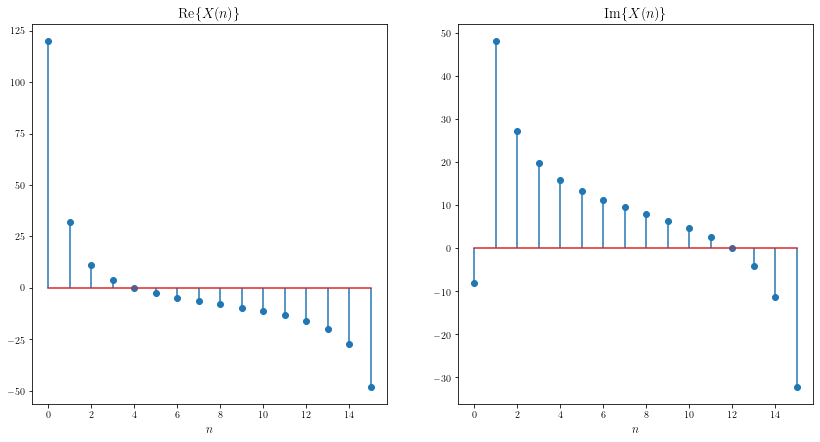

In [59]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import numpy as np

# Generating the Signal-Vector
k = np.arange(0,16,1)                                # creating index vector k
x = k + 1j* (7-k)                                    # create signal vector x

# Calculating DTF with fft
X = np.fft.fft(x)                                    # calculate fft of x

# Graphical output
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))         # create a plot and get fig and ax objects
ax1.stem(k,X.real, use_line_collection=True)                  # discrete plot of real(X)
ax2.stem(k,X.imag, use_line_collection=True)                  # discrete plot of imag(X)
ax1.set_xlabel(r'$n$', fontsize='large')
ax1.set_title(r'$\textrm{Re}\{X(n)\}$', fontsize='x-large')
ax2.set_xlabel(r'$n$', fontsize='large')
ax2.set_title(r'$\textrm{Im}\{X(n)\}$', fontsize='x-large')
plt.show()

**b)** The real part of $\text{DFT}\{\text{Re}\{x(k)\}\}$ is an even function, while the imaginary part is an odd function.
For $\text{DFT}\{j\text{Im}\{x(k)\}\}$ we can see the opposite, with the real part being odd and the imaginary even.

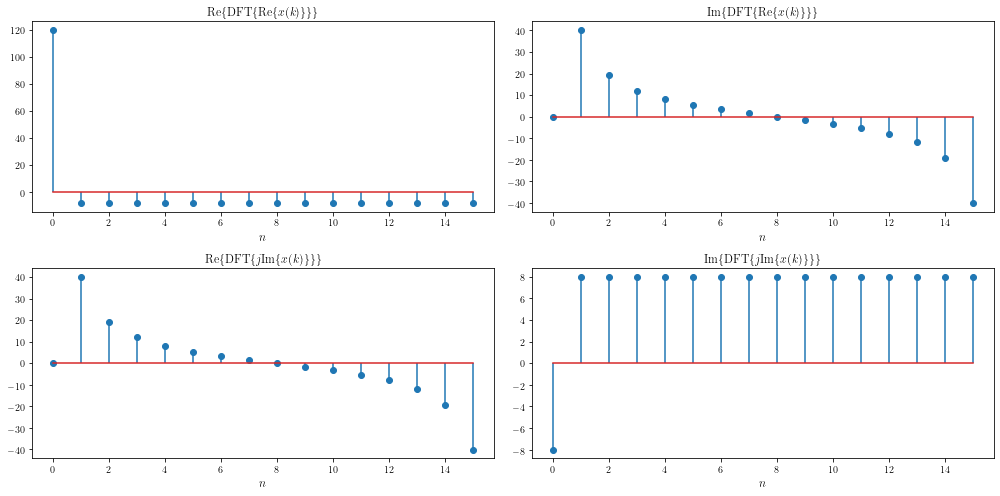

In [46]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import numpy as np

# Generating the Signal-Vector
k = np.arange(0,16,1)                                # creating index vector k
x = k + 1j* (7-k)                                    # create signal vector x

# Calculating DTF with fft
XRe = np.fft.fft(x.real)                                    # calculate fft of x
XIm = np.fft.fft(1j*x.imag)                                 # calculate fft of x

# Graphical output
fig, axs = plt.subplots(2, 2, figsize=(14, 7))         # create a plot and get fig and ax objects
axs[0, 0].stem(k,XRe.real, use_line_collection=True)
axs[0, 1].stem(k,XRe.imag, use_line_collection=True)
axs[1, 0].stem(k,XIm.real, use_line_collection=True)
axs[1, 1].stem(k,XIm.imag, use_line_collection=True)

for i in range(0,2):
    for j in range(0,2):
        axs[i, j].set_xlabel(r'$n$', fontsize='large')
        
axs[0, 0].set_title(r'$\textrm{Re}\{\textrm{DFT}\{\textrm{Re}\{x(k)\}\}\}$', fontsize='large')
axs[0, 1].set_title(r'$\textrm{Im}\{\textrm{DFT}\{\textrm{Re}\{x(k)\}\}\}$', fontsize='large')
axs[1, 0].set_title(r'$\textrm{Re}\{\textrm{DFT}\{j\textrm{Im}\{x(k)\}\}\}$', fontsize='large')
axs[1, 1].set_title(r'$\textrm{Im}\{\textrm{DFT}\{j\textrm{Im}\{x(k)\}\}\}$', fontsize='large')


plt.tight_layout()
plt.show()

**c)** A time shift produces a multiplication with an exponential function in the frequency spectrum:

\begin{equation*}
    x(t-t_0) \Leftrightarrow e^{-j\omega t_0} \cdot X(j\omega).
\end{equation*}


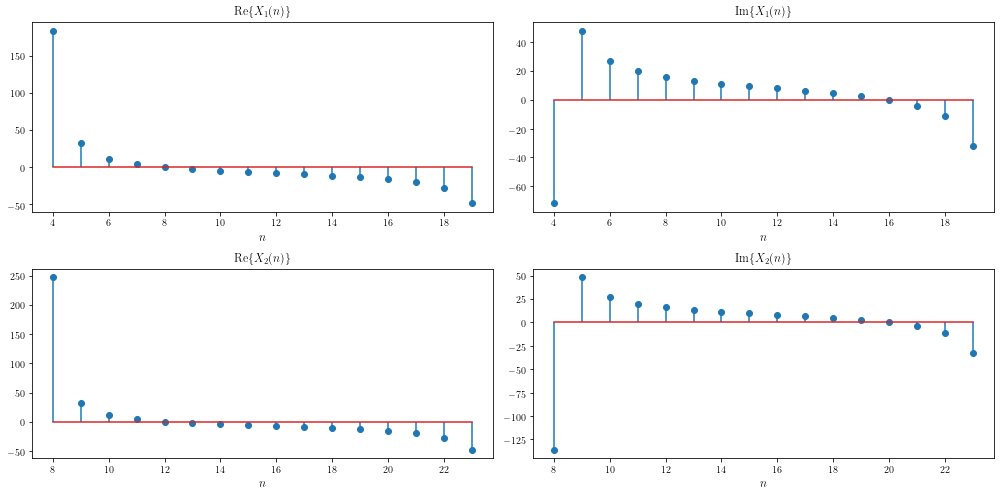

In [48]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import numpy as np

# Shift x
lambda1 = 4
lambda2 = 8
k1 = np.arange(lambda1,16+lambda1,1)                 # create index vector k=4...19
x1 = k1 + 1j* (7-k1)
k2 = np.arange(lambda2,16+lambda2,1)                 # create index vector k=8...23
x2 = k2 + 1j* (7-k2)

# Calculating DTF with fft
X1 = np.fft.fft(x1)                                    # calculate fft of x
X2 = np.fft.fft(x2)                                 # calculate fft of x

# Graphical output
fig, axs = plt.subplots(2, 2, figsize=(14, 7))         # create a plot and get fig and ax objects
axs[0, 0].stem(k1,X1.real, use_line_collection=True)
axs[0, 1].stem(k1,X1.imag, use_line_collection=True)
axs[1, 0].stem(k2,X2.real, use_line_collection=True)
axs[1, 1].stem(k2,X2.imag, use_line_collection=True)

for i in range(0,2):
    for j in range(0,2):
        axs[i, j].set_xlabel(r'$n$', fontsize='large')
        
axs[0, 0].set_title(r'$\textrm{Re}\{X_1(n)\}$', fontsize='large')
axs[0, 1].set_title(r'$\textrm{Im}\{X_1(n)\}$', fontsize='large')
axs[1, 0].set_title(r'$\textrm{Re}\{X_2(n)\}$', fontsize='large')
axs[1, 1].set_title(r'$\textrm{Im}\{X_2(n)\}$', fontsize='large')


plt.tight_layout()
plt.show()

**d)** After multiplicating the time signal with an exponential function, the frequency spectrum shows a frequency shifted version of the original spectrum.

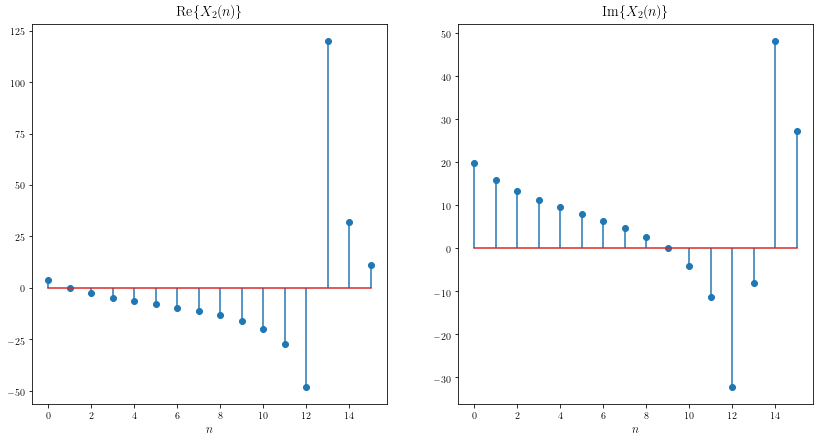

In [56]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import numpy as np
# Generating the Signal-Vector
k = np.arange(0,16,1)                                # creating index vector k
x = k + 1j* (7-k)                                    # create signal vector x

# Multiply x with exp-function
x2 = x * np.exp(-1j*2*np.pi*3*k/16)

# Calculating DTF with fft
X2 = np.fft.fft(x2)                                    # calculate fft of x

# Graphical output
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))         # create a plot and get fig and ax objects
ax1.stem(k,X2.real, use_line_collection=True)                  # discrete plot of real(X)
ax2.stem(k,X2.imag, use_line_collection=True)                  # discrete plot of imag(X)
ax1.set_xlabel(r'$n$', fontsize='large')
ax1.set_title(r'$\textrm{Re} \{X_2(n)\}$', fontsize='x-large')
ax2.set_xlabel(r'$n$', fontsize='large')
ax2.set_title(r'$\textrm{Im} \{X_2(n)\}$', fontsize='x-large')
plt.show()

#### Solution for exercise 4: interpolation by zero padding
Through \textit{zero padding} (filling up a vector with zeros) the spectral resolution of the DFT can be improved. Because the series $x(k)$ in this exercise have double lenght through \textit{zero padding}, the spectral resolution is also doubled: Every second value of $X_0(n)$ matches with the respective value of $X(n): X_0(2n) \equiv X(n)$ for $n = 0,1,2,\ldots,63$.

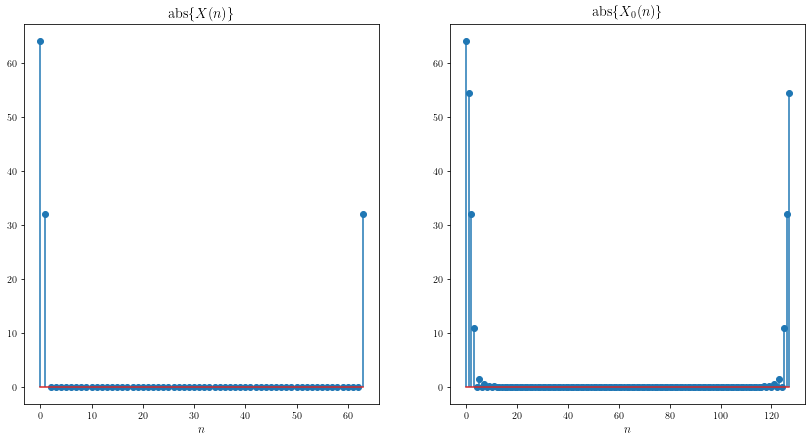

In [62]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import numpy as np

# Generating the Signal-Vector
N = 64
k = np.arange(0,N,1)                                # creating index vector k
x = 1 - np.cos(2*np.pi*k/N)                         # create signal vector x

# Add aditional zeros
x0 = np.append(np.zeros(64),x)

# Calculating DTF with fft
X = np.fft.fft(x)                                    # calculate fft of x
X0 = np.fft.fft(x0)                                  

# Graphical output
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))         # create a plot and get fig and ax objects
ax1.stem(np.abs(X), use_line_collection=True)                  # discrete plot of real(X)
ax2.stem(np.abs(X0), use_line_collection=True)                  # discrete plot of imag(X)
ax1.set_xlabel(r'$n$', fontsize='large')
ax1.set_title(r'$\textrm{abs} \{X(n)\}$', fontsize='x-large')
ax2.set_xlabel(r'$n$', fontsize='large')
ax2.set_title(r'$\textrm{abs} \{X_0(n)\}$', fontsize='x-large')
plt.show()


From the right hand figure, we see the following: If the number of added zeros is infinite, the spectra of the periodic continuous signal $\tilde{x} = 1 - \text{cos}(2\pi t/T)$ for all $t$ will not be approximated, but rather the spectra of the non-periodic signal

\begin{equation*}
x(k) = \left\{
    \begin{array}{l l}	
         1 - \text{cos}(2\pi t /T),&  0\leq t < T\\
         0,  & \text{else}
    \end{array}\right.\;.
\end{equation*}

